In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from tqdm import tqdm
from pyjet import cluster, DTYPE_PTEPM
plt.rcParams["figure.figsize"] = (10, 8)
data_base_dir = "/Users/yifenghuang/Desktop/Research/VAE/VAE_new_data/"
save_plot_dir = "/Users/yifenghuang/Desktop/Research/VAE/VAE_new_data/plots/"

In [2]:
data_files = []
data_names = ["B_background.h5","B_signal.h5","h_signal.h5","hv_signal.h5"]
for name in data_names:
    df = pandas.read_hdf(data_base_dir+name)
    data_files.append(df.values.reshape((-1, 50, 4)))

In [3]:
for name,data in zip(data_names,data_files):
    print(name,data.shape)

B_background.h5 (214, 50, 4)
B_signal.h5 (2644, 50, 4)
h_signal.h5 (34973, 50, 4)
hv_signal.h5 (19864, 50, 4)


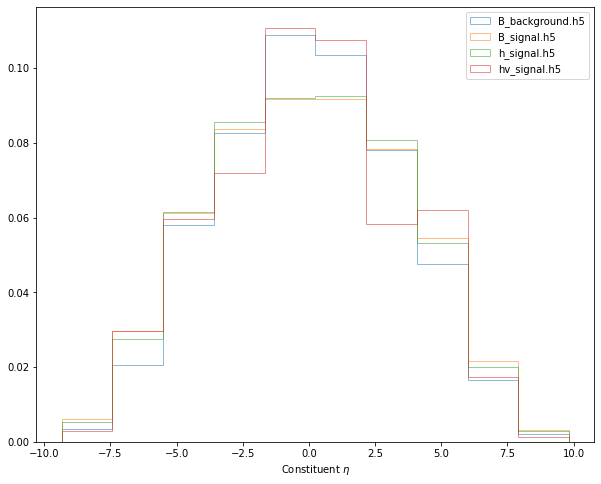

In [4]:
plt.figure()
for index,name,df in zip(range(len(data_files)),data_names,data_files):
    if index==0:
        n,b,_= plt.hist(df[:,:,1].flatten(),label=name, alpha=0.5, histtype="step", density=True)
    else:
        plt.hist(df[:,:,1].flatten(), label=name, bins=b, alpha=0.5, histtype="step", density=True)
plt.xlabel("Constituent $\eta$")
plt.legend()
if save_plot_dir:
    plt.savefig(save_plot_dir+"Constituent_eta.png")
plt.show()

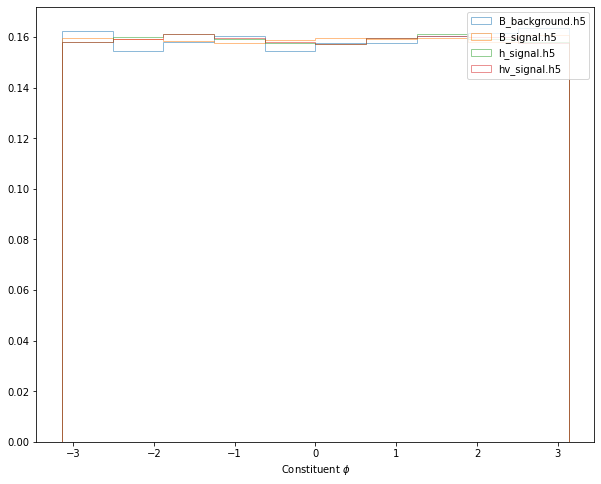

In [5]:
plt.figure()
for index,name,df in zip(range(len(data_files)),data_names,data_files):
    if index==0:
        n,b,_= plt.hist(df[:,:,2].flatten(),label=name, alpha=0.5, histtype="step", density=True)
    else:
        plt.hist(df[:,:,2].flatten(), label=name, bins=b, alpha=0.5, histtype="step", density=True)
plt.xlabel("Constituent $\phi$")
plt.legend()
if save_plot_dir:
    plt.savefig(save_plot_dir+"Constituent_phi.png")
plt.show()

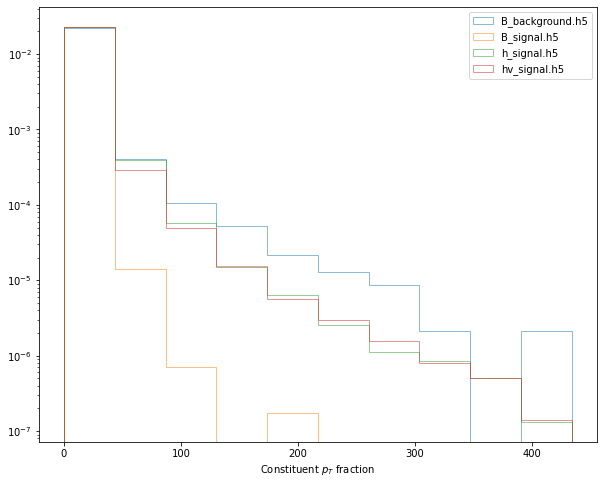

In [6]:
plt.figure()
for index,name,df in zip(range(len(data_files)),data_names,data_files):
    if index==0:
        n,b,_= plt.hist(df[:,:,0].flatten(),label=name, alpha=0.5, histtype="step", density=True)
    else:
        plt.hist(df[:,:,0].flatten(), label=name, bins=b, alpha=0.5, histtype="step", density=True)
plt.xlabel("Constituent $p_T$ fraction")
plt.yscale("log")
plt.legend()
if save_plot_dir:
    plt.savefig(save_plot_dir+"Constituent_pt.png")
plt.show()

In [7]:
def event_mass(myinput):
    ms = []
    for i in tqdm(range(len(myinput))):
        px = np.sum(myinput[i,:,0].flatten()*np.cos(myinput[i,:,2].flatten()))
        py = np.sum(myinput[i,:,0].flatten()*np.sin(myinput[i,:,2].flatten()))
        pz = np.sum(myinput[i,:,0].flatten()*np.sinh(myinput[i,:,1].flatten()))
        E = np.sum(myinput[i,:,0].flatten()*np.cosh(myinput[i,:,1].flatten()))
        ms += [(E**2-px*px-py*py-pz*pz)**0.5]
    return np.array(ms)

100%|██████████████████████████████████| 19864/19864 [00:00<00:00, 25956.71it/s]


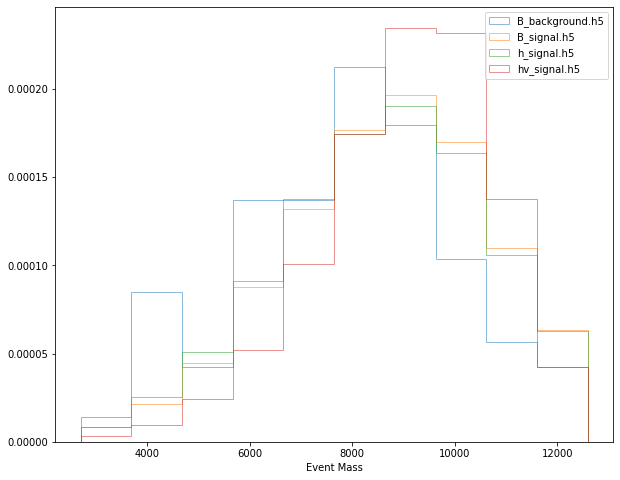

In [8]:
plt.figure()
for index,name,df in zip(range(len(data_files)),data_names,data_files):
    if index==0:
        n,b,_= plt.hist(event_mass(df),label=name, alpha=0.5, histtype="step", density=True)
    else:
        plt.hist(event_mass(df), label=name, bins=b, alpha=0.5, histtype="step", density=True)
plt.xlabel("Event Mass")
plt.legend()
if save_plot_dir:
    plt.savefig(save_plot_dir+"event_mass.png")
plt.show()

In [9]:
def MET(myinput):
    ms = []
    for i in tqdm(range(len(myinput))):
        px = np.sum(myinput[i,:,0].flatten()*np.cos(myinput[i,:,2].flatten()))
        py = np.sum(myinput[i,:,0].flatten()*np.sin(myinput[i,:,2].flatten()))
        ms += [px**2+py**2]
    return np.array(ms)

100%|██████████████████████████████████| 19864/19864 [00:00<00:00, 46497.94it/s]


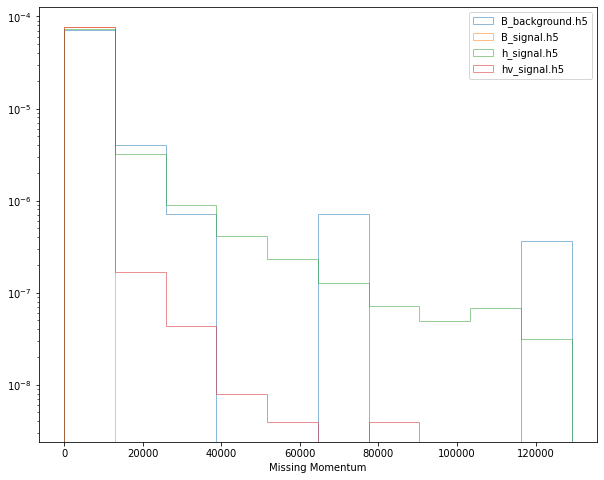

In [10]:
plt.figure()
for index,name,df in zip(range(len(data_files)),data_names,data_files):
    if index==0:
        n,b,_= plt.hist(MET(df),label=name, alpha=0.5, histtype="step", density=True)
    else:
        plt.hist(MET(df), label=name, bins=b, alpha=0.5, histtype="step", density=True)
plt.xlabel("Missing Momentum")
plt.legend()
plt.yscale("log")
if save_plot_dir:
    plt.savefig(save_plot_dir+"missing_momentum.png")
plt.show()

In [11]:
def jet_clustering(ojs, ptmin):
    print("clustering jets with paramert ptmin={}".format(ptmin))
    njets = []
    pTleadjet = []
    mleadjet = []
    for k in tqdm(range(len(ojs))):
        pseudojets_input = np.zeros(50, dtype=DTYPE_PTEPM)
        for i in range(50):
            pseudojets_input[i]['pT'] = ojs[k, i, 0]
            pseudojets_input[i]['eta'] = ojs[k, i, 1]
            pseudojets_input[i]['phi'] = ojs[k, i, 2]
        sequence = cluster(pseudojets_input, R=0.4, p=-1)
        jets = sequence.inclusive_jets(ptmin=ptmin)  # 5 gev
        njets += [len(jets)]
        if (len(jets) > 0):
            pTleadjet += [jets[0].pt]
            mleadjet += [jets[0].mass]
    return njets, pTleadjet, mleadjet

clustering jets with paramert ptmin=0.1


100%|███████████████████████████████████████| 214/214 [00:00<00:00, 6279.03it/s]


clustering jets with paramert ptmin=0.1


100%|█████████████████████████████████████| 2644/2644 [00:00<00:00, 6474.49it/s]


clustering jets with paramert ptmin=0.1


100%|███████████████████████████████████| 34973/34973 [00:05<00:00, 6717.96it/s]


clustering jets with paramert ptmin=0.1


100%|███████████████████████████████████| 19864/19864 [00:02<00:00, 6695.28it/s]


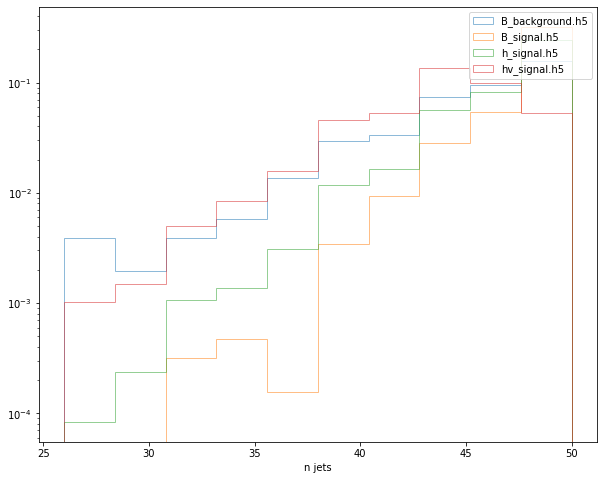

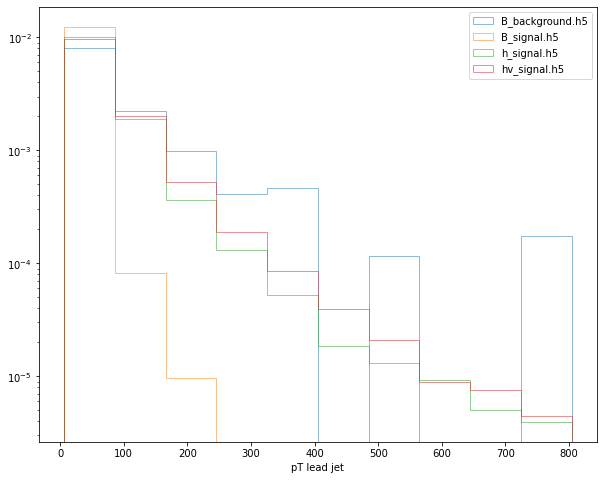

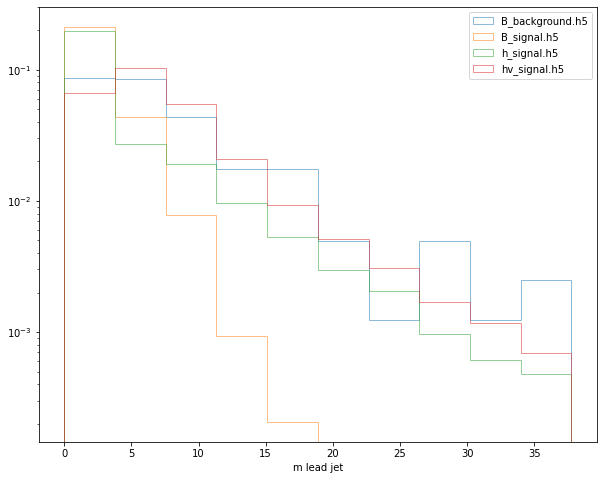

In [12]:
plot_label = ["n jets", "pT lead jet", "m lead jet"]
_ptmin = 0.1
_bins = None
clustering_list = []
for df in data_files:
    clustering_list.append(jet_clustering(df,_ptmin))
for i in range(len(plot_label)):
    plt.figure()
    for index,name,df in zip(range(len(data_files)),data_names,clustering_list):
        if index==0:
            n,b,_= plt.hist(df[i],label=name, alpha=0.5, histtype="step", density=True)
        else:
            plt.hist(df[i], label=name, bins=b, alpha=0.5, histtype="step", density=True)
    plt.xlabel(plot_label[i])
    plt.legend()
    plt.yscale("log")
    if save_plot_dir:
        plt.savefig(save_plot_dir+plot_label[i].replace(" ","_")+".png")
    plt.show()